In [1]:
import matplotlib

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
matplotlib.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
"""
matplotlib.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
"""
print("")

In [2]:
%run ../odr_v3.ipynb
C=np.array([1,10,100,1000])
mw=np.array([5.21,7.7,14,15])
uss=np.array([17.4,15.4,5.56,0.6])
Uanfang=np.array([17,17,17,15.2])
t=20e-3
R=470
Uende=Uanfang*np.exp(-t/(C*1e-6*R))

mw_theo=(Uanfang+Uende)/2
uss_theo=Uanfang-Uende

In [3]:
Uende

array([5.62124702e-18, 2.41205550e-01, 1.11081762e+01, 1.45667602e+01])

In [4]:
def draw(title="",save=""):
    
    plt.gcf().set_size_inches(12, 6)
    plt.grid(b=True, which='major', linewidth=1)
    plt.grid(b=True, which='minor', linewidth=0.2)
    plt.minorticks_on()
    plt.title(title)
    plt.legend()
    if save != "":
        plt.savefig(f"{save}.pdf",dpi=300,transparent=False)
    plt.show()

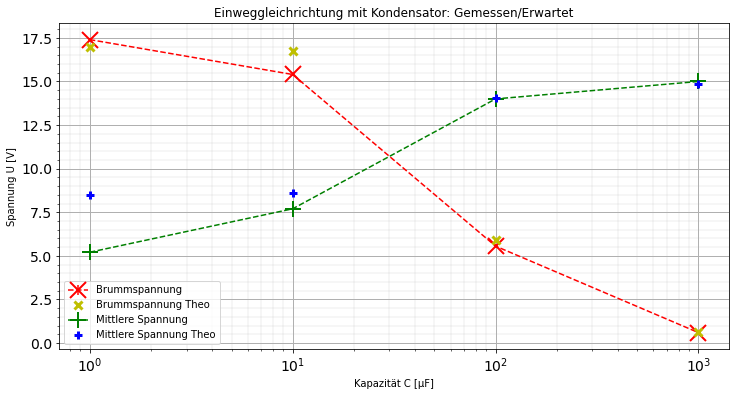

In [5]:
U_err=np.full(len(C),0.1)

plt.errorbar(x=C,y=uss,yerr=U_err,fmt='--x',label="Brummspannung",ms=16,mew=2,c='r')
plt.errorbar(x=C,y=uss_theo,fmt='x',label="Brummspannung Theo",ms=8,mew=3,c='y')

plt.xscale("log")
plt.errorbar(x=C,y=mw,yerr=U_err,fmt='--+',label="Mittlere Spannung",ms=16,mew=2,c='g')
plt.errorbar(x=C,y=mw_theo,fmt='+',label="Mittlere Spannung Theo",ms=8,mew=3,c='b')

plt.xlabel("Kapazität C [µF]")
plt.ylabel("Spannung U [V]")


draw("Einweggleichrichtung mit Kondensator: Gemessen/Erwartet","mess.theo")
